# `Heapsort堆積排序法`
* **`目的`**`：建立出完全最大（或最小）的堆。`
* **`描述`**`：根節點為array中的第一個點，每個節點都會有兩個子節點（一左一右），先依照這個結構邏輯去建立出「堆」，再進行排序。`
* **`時間複雜度`**`：O(nlogn)`

## `流程圖` 

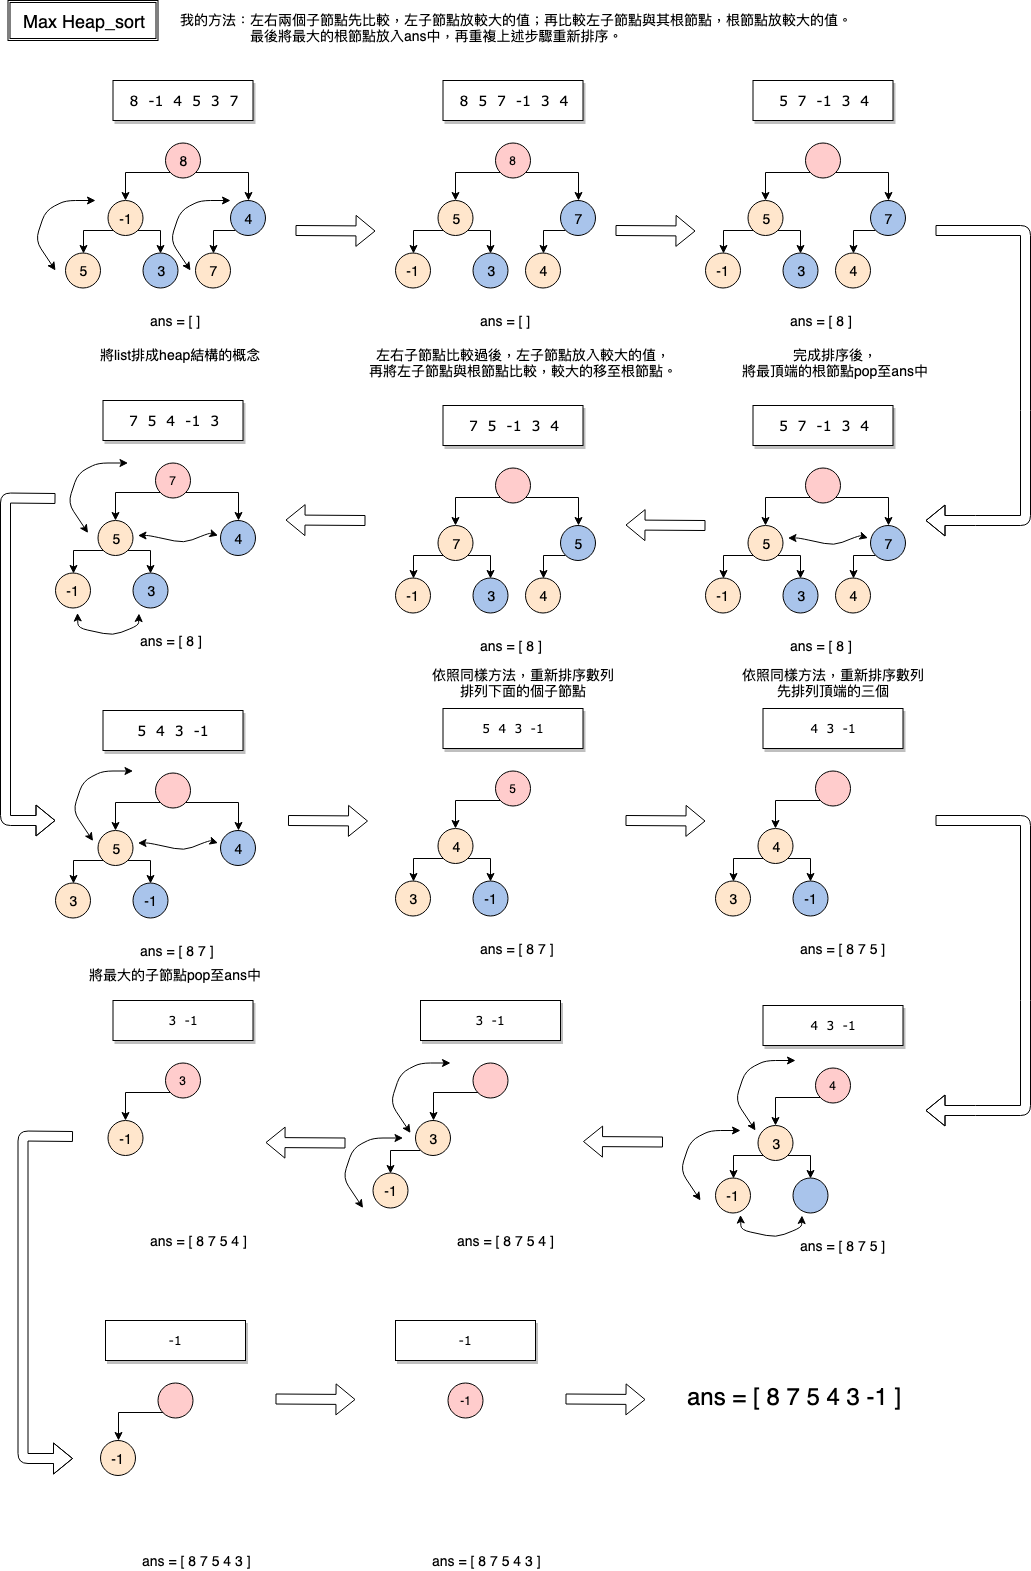

In [2]:
from IPython.display import Image
Image(filename="heap_sort_流程圖.png")

## `程式碼操作` （最終成果在最底端，可直接往下滑～）

_看了課程投影片中的教學影片後，我初步構想 heapsort 主要分成以下步驟（以大根堆為例）：_
1. 將 list 分解成「堆 heap」的結構。
2. 第一個點設為根節點，並在該點之下兩個點設定為子節點，  
    先將子節點先進行排序，左為大，右為小。
3. 由下而上，比較根節點與左邊子節點的大小，若子節點大於根節點的值，則兩者互換位置。
4. 將最頂層的根節點與最底層的最後一個右節點互換，並移除最後一個右節點的值。
5. 重複循環上述步驟，直到排序完成。

### 為了避免先看網站後，思考邏輯被侷限，以下是我先靠自己試著寫出的程式：

_我將heapsort鮮分為兩部分撰寫（以max_heapsort為例）：_  
`1. 分割list成為heap結構。`  
`2. 排序heap。 ` 

**1. 分割list成heap結構：**  
我想到的比較方法是，先將兩個子節點互相比較，左邊放大的，右邊放小的，  
再將左邊的子節點與它的根節點做比較，若子節點>根節點，則將兩者位置互換。  
而若是該heap中只有一個左邊的子節點，則直接將其與根節點做比較，若子節點>根節點，同樣互換位置。  
如此一來，遞迴後則可得到排序後的heap。  


**2. 排序heap：**  
我的方法是，創建一個ans來儲存已經排序好的最大值，將值一個一個放入ans。  
而若前一步驟執行完成，heap的最頂端為最大值，將其直接pop進入ans。  
每pop一次，因為原本list的結構將被改變，所以又要再次將新的list分割成heap結構。  
如此遞迴，直到list中無任何數值，都已append進ans中。

In [311]:
#1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。

def heap_sort(List):
    
    #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
    n = len(List)
    i = n
    
    #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
    root = i
    left = 2*i + 1
    right = 2*i + 2
    
    while n>=0:
        if len(List[left])>0 and len(List[right])>0: #左右兩個子節點先比較
            if List[left]<List[right]:
                List[left], List[right] = List[right], List[left]
        if len(List[root])>0 and len(List[left])>0: #左子節點與其根節點比較
            if List[left]>List[root]:
                List[root], List[left] = List[left], List[root]
        if len(List[left])>0: #只有左子節點時，左子節點跟其根節點比較
            if List[left]>List[root]: 
                List[root], List[left] = List[left], List[root]
        n-=1 #每執行完成一次，就將n減一，執行下一個點
        
#2. 排序heap。

    j = len(List)-1
    r = 0
    l = 1
    r = 2
    ans = []
    
    while j>=0:
        ans.append(List.pop(0))
        
        if len(List[1])>0 and len(List[2])>0: #左右兩個子節點先比較
            if List[1]<List[2]:
                List[1], List[2] = List[2], List[1]
        if len(List[0])>0 and len(List[1])>0: #左子節點與其根節點比較
            if List[1]>List[0]:
                List[0], List[1] = List[1], List[0]
        if len(List[1])>0: #只有左子節點時，左子節點跟其根節點比較
            if List[1]>List[0]: 
                List[0], List[1] = List[1], List[0]
        j-=1 #每執行完成一次，就將n減一，執行下一個點

    return ans

In [312]:
print(heap_sort([12, 11, 13, 5, 6, 7] ) )

IndexError: list index out of range

### `IndexError: list index out of range`
看來是我們在執行過程中，有超出list長度的問題，所以在進行這個步驟前，加一個if確認是否有值看看～  
`解決辦法：在此之前加入if判斷該位子是否在list長度內，若是，則進入程式執行動作。`

In [309]:
#1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。

def heap_sort(List):
    
    #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
    n = len(List)
    i = n
    
    #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
    root = i
    left = 2*i + 1
    right = 2*i + 2
    
    while n>=0:
        if left<n and right<n: # 加入if判斷left與right的位子是否在list長度n內
            if len(List[left])>0 and len(List[right])>0: #左右兩個子節點先比較
                if List[left]<List[right]:
                    List[left], List[right] = List[right], List[left]
            if len(List[root])>0 and len(List[left])>0: #左子節點與其根節點比較
                if List[left]>List[root]:
                    List[root], List[left] = List[left], List[root]
        if left<n:
            if len(List[left])>0: #只有左子節點時，左子節點跟其根節點比較
                if List[left]>List[root]: 
                    List[root], List[left] = List[left], List[root]
        n-=1 #每執行完成一次，就將n減一，執行下一個點

#2. 排序heap。

    j = len(List)-1
    r = 0
    l = 1
    r = 2
    ans = []
    
    while j>=0:
        ans.append(List.pop(0))
        
        if len(List[1])>0 and len(List[2])>0: #左右兩個子節點先比較
            if List[1]<List[2]:
                List[1], List[2] = List[2], List[1]
        if len(List[0])>0 and len(List[1])>0: #左子節點與其根節點比較
            if List[1]>List[0]:
                List[0], List[1] = List[1], List[0]
        if len(List[1])>0: #只有左子節點時，左子節點跟其根節點比較
            if List[1]>List[0]: 
                List[0], List[1] = List[1], List[0]
        j-=1 #每執行完成一次，就將n減一，執行下一個點

    return ans

In [310]:
print(heap_sort([12, 11, 13, 5, 6, 7] ) )

TypeError: object of type 'int' has no len()

### `TypeError: object of type 'int' has no len()`
這個錯誤似乎是在告訴我，int 這個型態無法計算其len為多少，  
看到這個的時候其實有點懷疑，因為我明明是設定list來判斷len，又為何會被判定為int呢？  
後來想一想發現原來是我已經指定了list中的某個數值，所以在程式中會自動轉換成int來判斷，因此不會有長度問題。  
`解決辦法：刪除len()函數，直接判斷該值是否為空。`

In [316]:
#1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。

def heap_sort(List):
    
    #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
    n = len(List)
    i = n
    
    #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
    root = i
    left = 2*i + 1
    right = 2*i + 2
    
    while n>=0:
        if left<n and right<n:
            if List[left] and List[right]: #左右兩個子節點先比較（此處無法用len來判斷，）
                if List[left]<List[right]:
                    List[left], List[right] = List[right], List[left]
            if List[root] and List[left]: #左子節點與其根節點比較
                if List[left]>List[root]:
                    List[root], List[left] = List[left], List[root]
        if left<n:
            if List[left]: #只有左子節點時，左子節點跟其根節點比較
                if List[left]>List[root]: 
                    List[root], List[left] = List[left], List[root]
        n-=1 #每執行完成一次，就將n減一，執行下一個點

#2. 排序heap。

    j = len(List)-1
    ans = []
    
    while j>=0:
        
        ans.append(List.pop(0))
        
        if 1<j and 2<j:
            if List[1] and List[2]: #左右兩個子節點先比較
                if List[1]<List[2]:
                    List[1], List[2] = List[2], List[1]
            if List[0] and List[1]: #左子節點與其根節點比較
                if List[1]>List[0]:
                    List[0], List[1] = List[1], List[0]
        if 1<j:
            if List[1]: #只有左子節點時，左子節點跟其根節點比較
                if List[1]>List[0]: 
                    List[0], List[1] = List[1], List[0]
        j-=1 #每執行完成一次，就將n減一，執行下一個點

    return ans

In [317]:
print(heap_sort([12, 11, 13, 5, 6, 7] ) )

[12, 13, 11, 7, 6, 5]


終於沒有跑出error了，但出來的結果似乎還沒有被排序完成，  
用spyder檢查一下，發現在while的設定中，邏輯有誤！  
因為每次的執行過程，heap結構都會重新排列，所以每次的root都不同，必須在每次的while迴圈中重新判斷。  
`解決辦法：將root、left、right的位子放入while迴圈，每次執行就重新判斷。`

In [281]:
#1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。

def heap_sort(List):
    
    #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
    #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
    n = len(List)
    i=n
    
    while i>=0:
        root = i
        left = 2*i + 1
        right = 2*i + 2
        
        if left<n and right<n:
            if List[left] and List[right]: #左右兩個子節點先比較
                if List[left]<List[right]:
                    List[left], List[right] = List[right], List[left]
            if List[root] and List[left]: #左子節點與其根節點比較
                if List[left]>List[root]:
                    List[root], List[left] = List[left], List[root]
        if left<n:
            if List[left]: #只有左子節點時，左子節點跟其根節點比較
                if List[left]>List[root]: 
                    List[root], List[left] = List[left], List[root]
        i-=1 #每執行完成一次，就將n減一，執行下一個點

        
#2. 排序heap。
    j = len(List)-1
    ans = []
    while j>=0:
        
        ans.append(List.pop(0))
    
        if 1<j and 2<j:
            if List[1] and List[2]: #左右先比較
                if List[1]<List[2]:
                    List[1], List[2] = List[2], List[1]
            if List[0] and List[1]: #左跟root比較
                if List[1]>List[0]:
                    List[0], List[1] = List[1], List[0]
        if 1<j:
            if List[1]: #只有左時，左跟root比較
                if List[1]>List[0]: 
                    List[0], List[1] = List[1], List[0]
        j-=1
    return ans

In [290]:
print(heap_sort([12, 11, 13, 5, 6, 7] ) )
print(heap_sort([12, 13, 11,-1,-5, 7, 6, 5]))
print(heap_sort([]))
print(heap_sort([-3, 13, 11,-1,-5, 7, 6, 5]))

[13, 12, 11, 7, 6, 5]
[13, 12, 11, 7, 6, 5, -1, -5]
[]
[13, 11, 7, 6, 5, -1, -3, -5]


QQQ 在多試了幾組測值後，發現竟然出現錯誤了，  
回頭檢查看看程式邏輯哪邊出錯～><

經過檢查程式碼後，發現有個地方的邏輯出問題了，  
因欸每次pop掉最大值後，heap結構都會被改變，因此要在pop掉值後，再重新排列一次heap結構，  
且每次的while執行時，root都會是不同的值，因此這些都必須放入pop掉值的那個while迴圈中。  
`解決辦法：修改第二個while迴圈，加入一個while迴圈，目的是在pop掉最大值後能夠再次重新排列新的heap。`

In [318]:
#1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。

def heap_sort(List):
    
    #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
    #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
    n = len(List)
    i=n
    
    while i>=0:
        root = i
        left = 2*i + 1
        right = 2*i + 2
        
        if left<n and right<n:
            if List[left] and List[right]: #左右兩個子節點先比較
                if List[left]<List[right]:
                    List[left], List[right] = List[right], List[left]
            if List[root] and List[left]: #左子節點與其根節點比較
                if List[left]>List[root]:
                    List[root], List[left] = List[left], List[root]
        if left<n:
            if List[left]: #只有左子節點時，左子節點跟其根節點比較
                if List[left]>List[root]: 
                    List[root], List[left] = List[left], List[root]
        i-=1 #每執行完成一次，就將n減一，執行下一個點

        
#2. 排序heap。
    j = len(List)-1
    ans = []
    
    while j>=0:
        
        ans.append(List.pop(0))
    
        if 1<j and 2<j:
            if List[1] and List[2]: #左右先比較
                if List[1]<List[2]:
                    List[1], List[2] = List[2], List[1]
            if List[0] and List[1]: #左跟root比較
                if List[1]>List[0]:
                    List[0], List[1] = List[1], List[0]
        if 1<j:
            if List[1]: #只有左時，左跟root比較
                if List[1]>List[0]: 
                    List[0], List[1] = List[1], List[0]
        n = len(List)
        i=n
                    
        while i>=0:
            
            root = i
            left = 2*i + 1
            right = 2*i + 2
        
            if left<n and right<n:
                if List[left] and List[right]: #左右兩個子節點先比較
                    if List[left]<List[right]:
                        List[left], List[right] = List[right], List[left]
                if List[root] and List[left]: #左子節點與其根節點比較
                    if List[left]>List[root]:
                        List[root], List[left] = List[left], List[root]
            if left<n:
                if List[left]: #只有左子節點時，左子節點跟其根節點比較
                    if List[left]>List[root]: 
                        List[root], List[left] = List[left], List[root]
                        
            i-=1 #每執行完成一次，就將n減一，執行下一個點
            
        j-=1
    return ans

In [320]:
print(heap_sort([12, 11, 13, 5, 6, 7] ) )
print(heap_sort([12, 13, 11,-1,-5, 7, 6, 5]))
print(heap_sort([]))
print(heap_sort([-3, 13, 11,-1,-5, 7, 6, 5]))

[13, 12, 11, 7, 6, 5]
[13, 12, 11, 7, 6, 5, -1, -5]
[]
[13, 11, 7, 6, 5, -1, -3, -5]


## 終於成功了OAQQ
**（在執行了320次之後）  
從頭到尾自己撰寫程式真的不簡單，  
從理解這個演算法的邏輯，到程式語法開始建構，直到debug最後完成，真的滿崩潰的XD  
但比起撰寫quicksort跟mergesort時，好像又多了一點對程式碼的熟悉感了，  
終於又有一個演算法被我學起來拉！XD**

### 改成老師跟助教規定的格式，就大功告成拉～

In [4]:
class Solution(object):

    def heap_sort(self,List):
        
####1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。
    
        #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
        n = len(List)
        i=n

        #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
        while i>=0:
            root = i
            left = 2*i + 1
            right = 2*i + 2
        
            if left<n and right<n:
                if List[left] and List[right]: #左右兩個子節點先比較
                    if List[left]<List[right]:
                        List[left], List[right] = List[right], List[left]
                if List[root] and List[left]: #左子節點與其根節點比較
                    if List[left]>List[root]:
                        List[root], List[left] = List[left], List[root]
            if left<n:
                if List[left]: #只有左子節點時，左子節點跟其根節點比較
                    if List[left]>List[root]: 
                        List[root], List[left] = List[left], List[root]
            i-=1 #每執行完成一次，就將n減一，執行下一個點

        
####2. 排序heap。
    
        j = len(List)-1
        ans = [] #先創一個ans空間暫存我們排序好的答案
    
        while j>=0: #當j大於等於0時，也就是list中還有值時
            
            ans.append(List.pop(0)) #把list的第一個值pop到ans中
            
            #接著重新比較list內剩下前三個值的大小（因為已經pop掉第一個值，所以0、1、2位置的值都不同了）
    
            if 1<j and 2<j:
                if List[1] and List[2]: #左先跟右先比較，大的放左邊
                    if List[1]<List[2]:
                        List[1], List[2] = List[2], List[1]
                if List[0] and List[1]: #左再跟root比較，較大的放root
                    if List[1]>List[0]:
                        List[0], List[1] = List[1], List[0]
            if 1<j:
                if List[1]: #只有左有值時，左直接跟root比較，較大的放root
                    if List[1]>List[0]: 
                        List[0], List[1] = List[1], List[0]
            
            #接著因為heap結構已經被改變，所以要再重新建構一次heap
            n = len(List)
            i=n
                    
            while i>=0:
                
                root = i
                left = 2*i + 1
                right = 2*i + 2
        
                if left<n and right<n:
                    if List[left] and List[right]: #左右兩個子節點先比較
                        if List[left]<List[right]:
                            List[left], List[right] = List[right], List[left]
                    if List[root] and List[left]: #左子節點與其根節點比較
                        if List[left]>List[root]:
                            List[root], List[left] = List[left], List[root]
                if left<n:
                    if List[left]: #只有左子節點時，左子節點跟其根節點比較
                        if List[left]>List[root]: 
                            List[root], List[left] = List[left], List[root]
                        
                i-=1 #每執行完成一次，就將n減一，執行下一個點
            
            j-=1
        return ans

In [5]:
output = Solution().heap_sort([12, 11, 13, 5, 6, 7])
output2 = Solution().heap_sort([12,8, 13, 11,-1,-5, 7, 6, 5])
output3 = Solution().heap_sort([])
output4 = Solution().heap_sort([-3, 13, 11,-1,-5, 7, 6, 5])
print(output)
print(output2)
print(output3)
print(output4)

[13, 12, 11, 7, 6, 5]
[13, 12, 11, 8, 7, 6, 5, -1, -5]
[]
[13, 11, 7, 6, 5, -1, -3, -5]


## 補充：

### 同樣的邏輯來看，我們只需將比較過程的>改成<，即可變成由小排到大的數列～
（即將較小的數放入左邊子節點，再將左子節點與根節點比較）

In [10]:
class Solution(object):

    def heap_sort(self,List):
        
####1. 分割list成為heap結構。我的想法是先比較左右兩子節點，左邊的放大的，再比較左子節點與根節點的大小，較大的放入根節點。
    
        #因為要先將排序完成，所以設定while迴圈，以List的長度來判斷是否完成
        n = len(List)
        i=n

        #觀察heap的結構，根節點（root）若為第i個位置，其左子節點與右子節點位置分別為2*i+1與2*i+2
        while i>=0:
            root = i
            left = 2*i + 1
            right = 2*i + 2
        
            if left<n and right<n:
                if List[left] and List[right]: #左右兩個子節點先比較
                    if List[left]>List[right]:
                        List[left], List[right] = List[right], List[left]
                if List[root] and List[left]: #左子節點與其根節點比較
                    if List[left]<List[root]:
                        List[root], List[left] = List[left], List[root]
            if left<n:
                if List[left]: #只有左子節點時，左子節點跟其根節點比較
                    if List[left]<List[root]: 
                        List[root], List[left] = List[left], List[root]
            i-=1 #每執行完成一次，就將n減一，執行下一個點

        
####2. 排序heap。
    
        j = len(List)-1
        ans = [] #先創一個ans空間暫存我們排序好的答案
    
        while j>=0: #當j大於等於0時，也就是list中還有值時
            
            ans.append(List.pop(0)) #把list的第一個值pop到ans中
            
            #接著重新比較list內剩下前三個值的大小（因為已經pop掉第一個值，所以0、1、2位置的值都不同了）
    
            if 1<j and 2<j:
                if List[1] and List[2]: #左先跟右先比較，大的放左邊
                    if List[1]>List[2]:
                        List[1], List[2] = List[2], List[1]
                if List[0] and List[1]: #左再跟root比較，較大的放root
                    if List[1]<List[0]:
                        List[0], List[1] = List[1], List[0]
            if 1<j:
                if List[1]: #只有左有值時，左直接跟root比較，較大的放root
                    if List[1]<List[0]: 
                        List[0], List[1] = List[1], List[0]
            
            #接著因為heap結構已經被改變，所以要再重新建構一次heap
            n = len(List)
            i=n
                    
            while i>=0:
                
                root = i
                left = 2*i + 1
                right = 2*i + 2
        
                if left<n and right<n:
                    if List[left] and List[right]: #左右兩個子節點先比較
                        if List[left]>List[right]:
                            List[left], List[right] = List[right], List[left]
                    if List[root] and List[left]: #左子節點與其根節點比較
                        if List[left]<List[root]:
                            List[root], List[left] = List[left], List[root]
                if left<n:
                    if List[left]: #只有左子節點時，左子節點跟其根節點比較
                        if List[left]<List[root]: 
                            List[root], List[left] = List[left], List[root]
                        
                i-=1 #每執行完成一次，就將n減一，執行下一個點
            
            j-=1
        return ans

In [11]:
output = Solution().heap_sort([12, 11, 13, 5, 6, 7])
output2 = Solution().heap_sort([12,8, 13, 11,-1,-5, 7, 6, 5])
output3 = Solution().heap_sort([])
output4 = Solution().heap_sort([-3, 13, 11,-1,-5, 7, 6, 5])
print(output)
print(output2)
print(output3)
print(output4)

[5, 6, 7, 11, 12, 13]
[-5, -1, 5, 6, 7, 8, 11, 12, 13]
[]
[-5, -3, -1, 5, 6, 7, 11, 13]


## 參考資料
https://wikimore.github.io/2016/03/03/heap-sort/  
https://www.geeksforgeeks.org/heap-data-structure/  
https://youtu.be/MtQL_ll5KhQ  
https://github.com/AnthonyDiGirolamo/algorithms-in-python/blob/master/heapsort.py  